Source: https://github.com/hunkim/PyTorchZeroToAll/blob/master/07_diabets_logistic.py

In [1]:
import torch
from torch.autograd import Variable
import numpy as np

In [2]:
dataPath = '../Downloads/diabetes.csv'
data = np.loadtxt(dataPath, delimiter=',',dtype=np.float32)

In [3]:
data.shape

(759, 9)

In [4]:
x_data = Variable(torch.from_numpy(data[:,:-1]))
y_data = Variable(torch.from_numpy(data[:,-1]))

In [5]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(8,6)
        self.l2 = torch.nn.Linear(6,4)
        self.l3 = torch.nn.Linear(4,1)
        
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        layer1 = self.sigmoid(self.l1(x))
        layer2 = self.sigmoid(self.l2(layer1))
        prediction = self.sigmoid(self.l3(layer2))
        return prediction

model = Model()
        

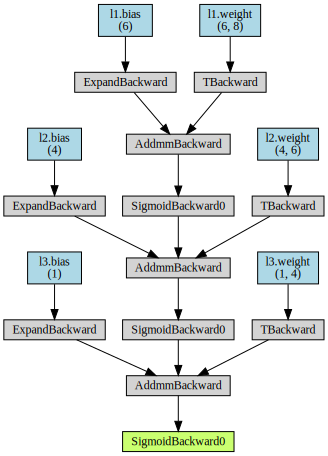

In [6]:
from torchviz import make_dot
make_dot(model(x_data), params=dict(model.named_parameters()))


In [7]:
criterion = torch.nn.modules.loss.BCELoss(size_average=True)
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)

In [8]:

for epoch in range(1000):
    prediction = model(x_data)
    loss = criterion(prediction, y_data)
    
    if epoch%200==0:
        print("epoch", epoch, "...loss: ", loss.data[0])

    optimizer.zero_grad
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.6/site-packages/torch/nn/functional.py:1189: UserWarning: Using a target size (torch.Size([759])) that is different to the input size (torch.Size([759, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


epoch 0 ...loss:  0.91302490234375
epoch 200 ...loss:  0.46348896622657776
epoch 400 ...loss:  0.4328354001045227
epoch 600 ...loss:  0.4200781285762787
epoch 800 ...loss:  0.4157283902168274


In [9]:
samples = x_data[:100,]
bools = 0
for i,sample in enumerate(samples):

    if (model(sample).data[0] >0.5) == (y_data[i].data[0]>0.5):
        bools +=1
print(bools/100)

0.76
